In [1]:
%pip install openpyxl==2.6.4

  Using cached https://files.pythonhosted.org/packages/f0/da/572cbc0bc582390480bbd7c4e93d14dc46079778ed915b505dc494b37c57/jdcal-1.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data-fairness.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [2]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    # FILTER (?date > "2019-01-01"^^xsd:date)
    FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n422,Carbon Portal


In [3]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name
0,SeaDataNet Common DAta Index (CDI),ISO 19115/19139
1,SeaDataNet Common DAta Index (CDI),EDMO
2,SeaDataNet Common DAta Index (CDI),SeaDataNet CDI
3,SeaDataNet Common DAta Index (CDI),NERC vocabulary service
4,DEIMS-SDR,EnvThes
5,Madrigal,Cedar
6,ACTRIS - In-Situ unit,CF standard names
7,Carbon Portal,Darwin Core
8,Carbon Portal,PROV-O
9,Carbon Portal,ICOS


In [4]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/hasAuthenticationMethod
1,http://envri.eu/ns/usesAuthorisationTechnique
2,http://envri.eu/ns/contentAccessAuthorizationRequired
3,http://envri.eu/ns/maintainsOwnUserDatabase


In [5]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n773,https://www.wikidata.org/entity/Q2063
1,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n773,https://www.wikidata.org/entity/Q54872
2,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n773,https://www.wikidata.org/entity/Q2115
3,LW (Marine) EUROBIS metadata,http://envri.eu/ns/supportedExportFormats,n499,https://www.wikidata.org/entity/Q2063
4,LW (Marine) EUROBIS metadata,http://envri.eu/ns/supportedExportFormats,n499,https://www.wikidata.org/entity/Q45432
...,...,...,...,...
305,SDN SeaDataNet Common DAta Index (CDI) metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
306,EISCAT Madrigal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q1145976,NaN
307,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
308,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasPrimaryStorageFormat,http://envri.eu/ns/DEIMS-SDR,NaN


In [6]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,MySQL,https://www.wikidata.org/entity/Q28600460
1,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/ISO19115_19139
2,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/SeaDataNetCommunityProfile
3,DEIMS-SDR,https://www.wikidata.org/entity/Q50377276
4,DEIMS-SDR,http://envri.eu/ns/EML2.0
5,DEIMS-SDR,https://www.wikidata.org/entity/Q30079268
6,DEIMS-SDR,http://envri.eu/ns/INSPIRE_EF
7,DEIMS-SDR,https://www.wikidata.org/entity/Q7451082
8,Madrigal,http://envri.eu/ns/none
9,ACTRIS - In-Situ unit,https://www.wikidata.org/entity/Q50377276


In [7]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n773,https://www.wikidata.org/entity/Q2063
1,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n773,https://www.wikidata.org/entity/Q54872
2,IAGOS IAGOS repository metadata,http://envri.eu/ns/supportedExportFormats,n773,https://www.wikidata.org/entity/Q2115
3,LW (Marine) EUROBIS metadata,http://envri.eu/ns/supportedExportFormats,n499,https://www.wikidata.org/entity/Q2063
4,LW (Marine) EUROBIS metadata,http://envri.eu/ns/supportedExportFormats,n499,https://www.wikidata.org/entity/Q45432
...,...,...,...,...
305,SDN SeaDataNet Common DAta Index (CDI) metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q2115,NaN
306,EISCAT Madrigal metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q1145976,NaN
307,ACTRIS EARLINET Database metadata,http://envri.eu/ns/hasPrimaryStorageFormat,https://www.wikidata.org/entity/Q192588,NaN
308,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasPrimaryStorageFormat,http://envri.eu/ns/DEIMS-SDR,NaN


In [8]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,ACTRIS repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN
1,Euro-Argo repository,http://envri.eu/ns/hasPersistencyGuaranty,50 years,NaN
2,EISCAT repository,http://envri.eu/ns/hasPersistencyGuaranty,10 years,NaN
3,SDN repository,http://envri.eu/ns/hasPersistencyGuaranty,stewardship,NaN
4,ACTRIS repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/none,NaN
5,ANAEE-France repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
6,EPOS repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/none,NaN
7,SDN repository,http://envri.eu/ns/hasPersistencyGuaranty,stewardship,NaN
8,EPOS repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/none,NaN
9,ACTRIS repository,http://envri.eu/ns/hasPersistencyGuaranty,false,NaN


In [9]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [10]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q2764521,NaN
1,SIOS Norwegian Meteorological Institute access mechanism,http://envri.eu/ns/supportsAccessTechnology,file:///home/jovyan/report/fairness-assessment/http,NaN
2,SDN SeaDataNet Central Data Products access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://www.wikidata.org/entity/Q628566,NaN
3,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q188816,NaN
4,EPOS local EU-EIDA access mechanism,http://envri.eu/ns/supportsAccessTechnology,https://www.wikidata.org/entity/Q193424,NaN
...,...,...,...,...
62,EPOS EPOS CSW access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
63,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
64,IAGOS IAGOS repository access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN
65,LW (Marine) Marine Data Archive access mechanism,http://envri.eu/ns/AccessWithoutCosts,true,NaN


In [11]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/hasAuthenticationMethod,account manually,NaN
1,SIOS Norwegian Meteorological Institute access mechanism,http://envri.eu/ns/hasAuthenticationMethod,none-open,NaN
2,SDN SeaDataNet Central Data Products access mechanism,http://envri.eu/ns/hasAuthenticationMethod,Marine-ID,NaN
3,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/hasAuthenticationMethod,none-open,NaN
4,EPOS local EU-EIDA access mechanism,http://envri.eu/ns/hasAuthenticationMethod,http://envri.eu/ns/planned,NaN
...,...,...,...,...
98,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
99,IAGOS IAGOS repository access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
100,LW (Marine) Marine Data Archive access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
101,EISCAT Madrigal access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN


In [12]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,SIOS Norwegian Meteorological Institute vocabularies,http://envri.eu/ns/hasVocabularyIri,https://github.com/steingod/scivocab/,NaN
1,SDN SeaDataNet Central Data Products vocabularies,http://envri.eu/ns/hasVocabularyIri,http://standards.iso.org/ittf/PubliclyAvailableStandards/ISO_19139_Schemas/resources/codelist/ML_gmxCodelists.xml,NaN
2,EISCAT EISCAT Schedule vocabularies,http://envri.eu/ns/hasVocabularyIri,https://www.wikidata.org/entity/Q513000,NaN
3,ACTRIS EARLINET Database vocabularies,http://envri.eu/ns/hasVocabularyIri,http://cfconventions.org/,NaN
4,LW (Marine) EUROBIS vocabularies,http://envri.eu/ns/hasVocabularyIri,http://www.marinespecies.org/,NaN
...,...,...,...,...
66,SDN SeaDataNet Common DAta Index (CDI) metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,true,NaN
67,EISCAT Madrigal metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
68,ACTRIS EARLINET Database metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,false,NaN
69,eLTER DEIMS-SDR metadata,http://envri.eu/ns/categoriesAreDefinedInRegistries,partially,NaN


In [13]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [14]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [15]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,LW (Marine) EUROBIS access mechanism,http://envri.eu/ns/usesDataLicenses,n475,http://www.wikidata.org/entity/Q6938433
1,SIOS Norwegian Meteorological Institute access mechanism,http://envri.eu/ns/usesDataLicenses,n636,http://www.wikidata.org/entity/Q20007257
2,SDN SeaDataNet Central Data Products access mechanism,http://envri.eu/ns/usesDataLicenses,n870,http://envri.eu/ns/LocalLicense
3,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/usesDataLicenses,https://www.wikidata.org/entity/Q513000,NaN
4,EISCAT EISCAT Schedule access mechanism,http://envri.eu/ns/usesDataLicenses,n85,http://envri.eu/ns/LocalLicense
...,...,...,...,...
137,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
138,IAGOS IAGOS repository access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
139,LW (Marine) Marine Data Archive access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
140,EISCAT Madrigal access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN


In [16]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,IAGOS IAGOS repository metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
1,LW (Marine) EUROBIS metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
2,ACTRIS GRES metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
3,EPOS Terradue metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
4,EPOS RESIF (France) metadata,http://envri.eu/ns/hasMachineReadableProvenance,machine readable provenance,NaN
5,ACTRIS CLOUDNET metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
6,EISCAT EISCAT Schedule metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
7,EPOS MySQL metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
8,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
9,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN


In [17]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,EARLINET Database data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
1,GRES data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
2,SeaDataNet Common DAta Index (CDI) data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
3,CLOUDNET data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
4,Marine Data Archive data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
5,ANAEE-France Metadata Catalog data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
6,EPOS CSW data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
7,Carbon Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
8,IAGOS repository data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
9,SeaDataNet Central Data Products data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN


In [18]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q58333293,NaN
1,SIOS Norwegian Polar Data Centre identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/none,NaN
2,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/PDC,NaN
3,LW (Marine) Marine Data Archive identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q11412386,NaN
4,eLTER DEIMS-SDR identifier,http://envri.eu/ns/usesProvider,https://www.wikidata.org/entity/Q11412386,NaN
...,...,...,...,...
86,SDN SeaDataNet Central Data Products identifier,http://envri.eu/ns/isAssigned,manually,NaN
87,LW (Marine) EUROBIS identifier,http://envri.eu/ns/isAssigned,manually,NaN
88,EPOS European Federated Data Archive identifier,http://envri.eu/ns/isAssigned,automatically,NaN
89,EISCAT EISCAT Schedule identifier,http://envri.eu/ns/isAssigned,automatically,NaN


In [19]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,IAGOS IAGOS repository metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://catalogue2.sedoo.fr/geonetwork/srv/api/records/575882c0-64ce-4648-bb19-00030d5d63af/formatters/xml,NaN
1,LW (Marine) EUROBIS metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://www.lifewatch.be/en/imis?module=dataset&dasid=1841&show=eml,NaN
2,ACTRIS GRES metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/none,NaN
3,Euro-Argo Euro-Argo Data metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://doi.org/10.17882/42182,NaN
4,ACTRIS CLOUDNET metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/none,NaN
...,...,...,...,...
76,ACTRIS ACTRIS - In-Situ unit identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/planned,NaN
77,EPOS local EU-EIDA identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
78,EPOS European Federated Data Archive identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
79,EISCAT EISCAT Schedule identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN


In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,ACTRIS repository,http://envri.eu/ns/hasMetadata,n244,NaN
1,ACTRIS repository,http://envri.eu/ns/hasMetadata,n295,NaN
2,EPOS repository,http://envri.eu/ns/hasMetadata,n674,NaN
3,Euro-Argo repository,http://envri.eu/ns/hasMetadata,n404,NaN
4,EISCAT repository,http://envri.eu/ns/hasMetadata,n92,NaN
5,SDN repository,http://envri.eu/ns/hasMetadata,n846,NaN
6,ACTRIS repository,http://envri.eu/ns/hasMetadata,n187,NaN
7,ANAEE-France repository,http://envri.eu/ns/hasMetadata,n575,NaN
8,EPOS repository,http://envri.eu/ns/hasMetadata,n920,NaN
9,SDN repository,http://envri.eu/ns/hasMetadata,n881,NaN


In [21]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,ACTRIS repository,http://envri.eu/ns/hasAllocation,http://envri.eu/ns/centralized,NaN
1,ACTRIS repository,http://envri.eu/ns/hasAllocation,http://envri.eu/ns/centralized,NaN
2,EPOS repository,http://envri.eu/ns/hasAllocation,http://envri.eu/ns/Domain,NaN
3,Euro-Argo repository,http://envri.eu/ns/hasAllocation,http://envri.eu/ns/CentralDataRepository,NaN
4,EISCAT repository,http://envri.eu/ns/hasAllocation,http://envri.eu/ns/CentralDataRepository,NaN
...,...,...,...,...
208,ACTRIS repository,http://envri.eu/ns/searchOnData,true,NaN
209,LifeWatch repository,http://envri.eu/ns/searchOnData,true,NaN
210,IAGOS repository,http://envri.eu/ns/searchOnData,true,NaN
211,EISCAT repository,http://envri.eu/ns/searchOnData,true,NaN


,count
JavaScript Object Notation,2
NetCDF CF,9
NaN,3
HDF,1
plain text,2
Extensible Markup Language,2
NetCDF,9
comma-separated values,5
Nasa Ames ASCII,2
Raster data,1


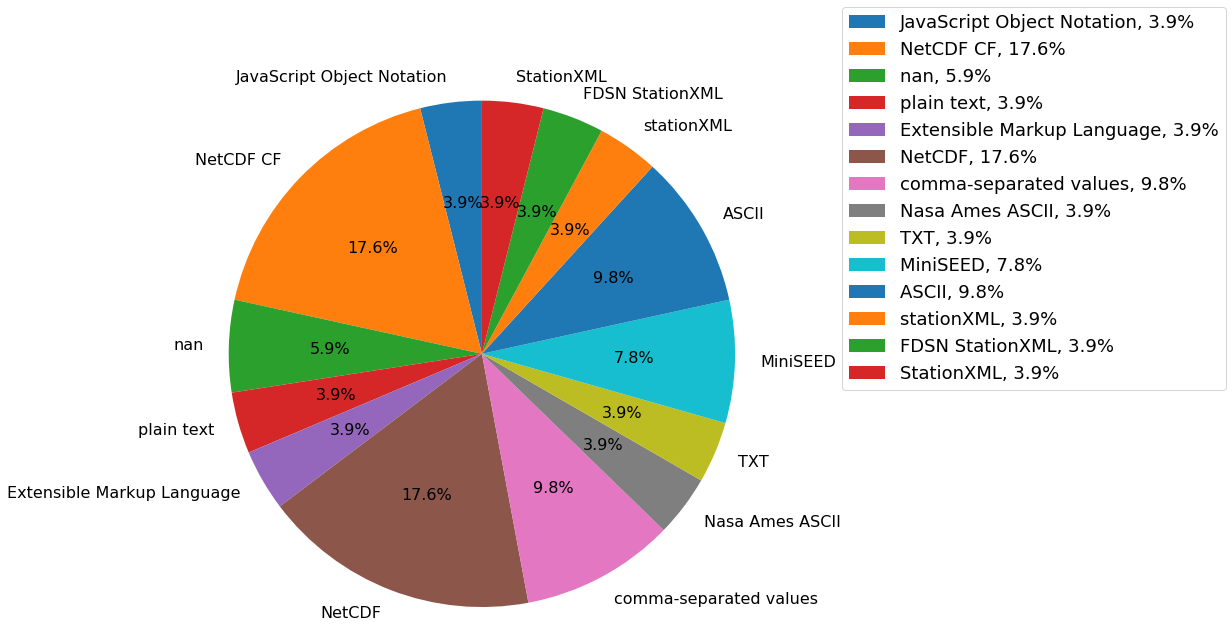

In [22]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 2}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 18},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [23]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?ri_domain ?rep_label ?dataschema WHERE {
    ?ri a rm:ResearchInfrastructure .
    ?ri envri:acronym ?ri_acronym . 
    ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasData ?data .
    ?data a wd:Q42848 .
    ?data envri:dataSchemaIsRegistered [ rdf:li [ rdfs:label ?dataschema ] ] 
}
""")

display(q)



,ri_acronym,ri_domain,rep_label,dataschema
0,ACTRIS,Atmosphere,ACTRIS - In-Situ unit,CEDA
1,SIOS,Atmosphere,Norwegian Meteorological Institute,NetCDF
2,SIOS,ecosystem,Norwegian Meteorological Institute,NetCDF
3,ACTRIS,Atmosphere,ACTRIS-ACCESS,CEDA
4,SIOS,Atmosphere,Norwegian Polar Data Centre,NetCDF
5,SIOS,ecosystem,Norwegian Polar Data Centre,NetCDF
6,LW (Marine),marine,EUROBIS,OBIS event scheme
7,LW (Marine),marine,EUROBIS,Darwin Core Archive
8,IAGOS,Atmosphere,IAGOS repository,local registry
9,IAGOS,Atmosphere,IAGOS repository,local registry


,count
ISO 19115/19139,2
EDMO,2
SeaDataNet CDI,2
NERC vocabulary service,2
EnvThes,3
Cedar,1
CF standard names,4
Darwin Core,1
PROV-O,1
ICOS,1


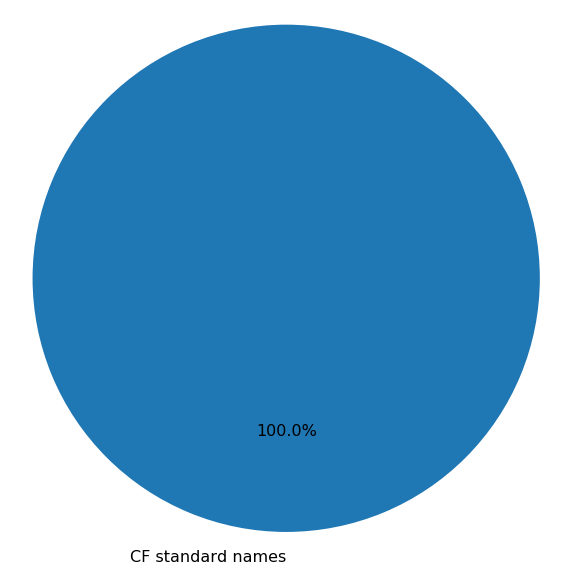

In [24]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
#group by ?vocab_name
""")

#display(q)
write(q, 'vocab.xlsx')


c = collections.Counter(q['vocab_name'])
display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 4}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

#total = sum(sizes)
#plt.legend(
#    loc='upper left',
#    labels=['%s, %1.1f%%' % (
#        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
#    prop={'size': 11},
#    bbox_to_anchor=(1, 1),
#    bbox_transform=fig1.transFigure
#)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [25]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?id_system ?id_provider WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ] .
    ?id envri:usesProvider [ rdfs:label ?id_provider]
}
""")

display(q)

write(q, 'id_kind.xlsx')
#    ?id a [rdfs:label ?id_kind] . 
 #   ?ri envri:hasDomain [ rdf:li [ rdfs:label ?ri_domain ] ] .


,ri_acronym,rep_label,id_system,id_provider
0,SDN,SeaDataNet Common DAta Index (CDI),B2HANDLE,EUDAT
1,ACTRIS,CLOUDNET,none,none
2,EPOS,Terradue,none,Zenodo
3,EISCAT,Madrigal,void type,void type
4,LifeWatch,LifeWatch Italy Portal,NaN,planned
5,LW (Marine),EUROBIS,DOI,DataCite
6,EPOS,European Federated Data Archive,DataCite,DataCite
7,EPOS,EPOS CSW,HTTP URI,none
8,eLTER,eLTER CDN,NaN,NaN
9,SIOS,Norwegian Polar Data Centre,UUID,none


,count
planned,2
identifier,35
PID,15
local ID,9
none,2
DOI,5
NaN,2


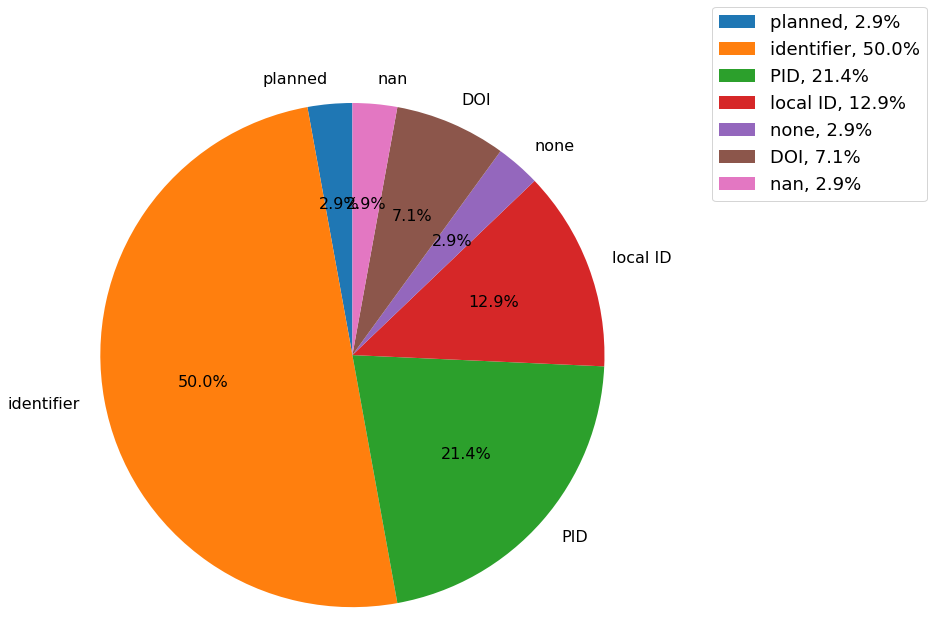

In [26]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>
SELECT ?id_kind WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
          envri:usesIdentifier [
             rdf:type [rdfs:label ?id_kind 
             ]
          ]
        ]  
} 
# GROUP BY ?id_kind
""")

#display(q)

c = collections.Counter(q['id_kind'])

display(pd.DataFrame.from_dict(dict(c), orient='index', columns=['count']))

c = {x : c[x] for x in c if c[x] >= 1}

labels = list(c.keys())
sizes = list(c.values())

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 18},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure
)

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
plt.show()

In [27]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?id_system ?id_provider WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem ?id_system .
    ?id envri:usesProvider ?id_provider
}
""")

display(q)


,ri_acronym,rep_label,id_system,id_provider
0,SDN,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/B2HANDLE,https://www.wikidata.org/entity/Q50177245
1,ACTRIS,CLOUDNET,http://envri.eu/ns/none,http://envri.eu/ns/none
2,EPOS,Terradue,http://envri.eu/ns/none,https://www.wikidata.org/entity/Q22661177
3,EISCAT,Madrigal,https://www.wikidata.org/entity/Q513000,https://www.wikidata.org/entity/Q513000
4,LifeWatch,LifeWatch Italy Portal,http://envri.eu/ns/NULL,http://envri.eu/ns/planned
5,LW (Marine),EUROBIS,https://www.wikidata.org/entity/Q25670,https://www.wikidata.org/entity/Q58333293
6,EPOS,European Federated Data Archive,https://www.wikidata.org/entity/Q58333293,https://www.wikidata.org/entity/Q58333293
7,EPOS,EPOS CSW,http://envri.eu/ns/HTTPURI,http://envri.eu/ns/none
8,eLTER,eLTER CDN,http://envri.eu/ns/NULL,http://envri.eu/ns/NULL
9,SIOS,Norwegian Polar Data Centre,https://www.wikidata.org/entity/Q195284,http://envri.eu/ns/none


In [28]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label 
}
""")

display(q)
write(q, 'repos.xlsx')



,ri_acronym,rep_label
0,EPOS,MySQL
1,SDN,SeaDataNet Common DAta Index (CDI)
2,eLTER,DEIMS-SDR
3,EISCAT,Madrigal
4,ACTRIS,ACTRIS - In-Situ unit
5,ICOS,Carbon Portal
6,ANAEE-France,ANAEE-France Metadata Catalog
7,eLTER,EUDAT/FZJ B2SHARE
8,SIOS,Norwegian Meteorological Institute
9,EPOS,VERCE Seismic Forward Modeling Experimental Data


In [29]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?domain ?repos_type WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasDomain ?ri_domain .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:usesIdentifierSystem [ rdfs:label ?id_system ] .
    ?id envri:usesProvider [ rdfs:label ?id_provider]
}
""")

display(q)

#write(q, 'id_kind.xlsx')

,ri_acronym,rep_label,domain,repos_type
0,SDN,SeaDataNet Common DAta Index (CDI),NaN,NaN
1,ACTRIS,CLOUDNET,NaN,NaN
2,EPOS,Terradue,NaN,NaN
3,EISCAT,Madrigal,NaN,NaN
4,LifeWatch,LifeWatch Italy Portal,NaN,NaN
5,LW (Marine),EUROBIS,NaN,NaN
6,EPOS,European Federated Data Archive,NaN,NaN
7,EPOS,EPOS CSW,NaN,NaN
8,eLTER,eLTER CDN,NaN,NaN
9,SIOS,Norwegian Polar Data Centre,NaN,NaN


In [30]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id a wd:Q853614 .
    ?id envri:includesMetadataSchema [rdf:li [ rdfs:label ?metaData ] ]
}
order by ?rep_label
""")

display(q)

,ri_acronym,rep_label,metaData
0,ACTRIS,EARLINET Database,ISO 19115
1,ACTRIS,EARLINET Database,NetCDF
2,EPOS,European Federated Data Archive,file checksum
3,EPOS,European Federated Data Archive,file location
4,EPOS,European Federated Data Archive,PID replica
5,LifeWatch,LifeWatch Italy Portal,ISO 19115/19139


In [77]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep a envri:Repository .
    ?rep rdfs:label ?rep_label .
    ?rep envri:hasMetadata ?md .
    ?md envri:hasMachineReadableDatasetMetadata ?metaData 
}
order by (?rep_label)
""")

display(q)

,ri_acronym,rep_label,metaData
0,ACTRIS,ACTRIS - In-Situ unit,https://thredds.nilu.no/thredds/iso/ebas/ZA0001G.20160101000000.20190211140714.uv_abs.ozone.air.3y.1h.ZA02L_thermo_4m.ZA02L_primary_standard_49i_PS.lev2.nc?catalog=http%3A%2F%2Fthredds.nilu.no%2Ft...
1,ACTRIS,ACTRIS-ACCESS,http://envri.eu/ns/none
2,ANAEE-France,ANAEE-France Metadata Catalog,https://www.wikidata.org/entity/Q513000
3,ACTRIS,ASC,http://envri.eu/ns/none
4,ACTRIS,CLOUDNET,http://envri.eu/ns/none
5,ICOS,Carbon Portal,https://hdl.handle.net/11676/-ffoiHjX5NDN0Vq_fKuVmas0
6,eLTER,DEIMS-SDR,http://envri.eu/ns/none
7,ACTRIS,EARLINET Database,https://login.earlinet.org:8443/thredds/dodsC/earlinedbpubscan/po/optical_products/2017/v01/EARLINET_AerRemSen_pot_Lev01_b0355_201702161806_201702161929_v01_qc02.nc.html
8,EISCAT,EISCAT Schedule,https://www.wikidata.org/entity/Q513000
9,EPOS,EPOS CSW,https://data.geoscience.earth/id/dataset/borehole


,rep_label,metaSchema


,ri_acronym,rep_label,metadataschema


In [56]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure .
         ?ri envri:acronym ?ri_acronym ;
       envri:hasRepository [
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

display(q)
write(q, 'metadataschema.xlsx')



,ri_acronym,rep_label,schema_name
0,IAGOS,IAGOS repository,ISO 19115/19139
1,EPOS,MySQL,DCAT Application Profile for Data Portals in Europe
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,S-PROV
3,eLTER,DEIMS-SDR,ISO 19115
4,eLTER,DEIMS-SDR,EML 2.0
5,eLTER,DEIMS-SDR,Geographic Metadata XML
6,eLTER,DEIMS-SDR,INSPIRE EF
7,eLTER,DEIMS-SDR,SensorML
8,EPOS,Terradue,ISO 19119
9,EISCAT,Madrigal,none


In [57]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
PREFIX wd: <https://www.wikidata.org/entity/>

SELECT ?ri_acronym ?rep_label ?metaData WHERE {
    ?ri a rm:ResearchInfrastructure . 
    ?ri envri:acronym ?ri_acronym .
    ?ri envri:hasRepository ?rep .
    ?rep rdfs:label ?rep_label .
    ?rep envri:usesIdentifier ?id .
    ?id envri:includesMetadataSchema [rdf:li [ rdfs:label ?metaData ] ]
}
order by ?rep_label
""")

display(q)

q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

,ri_acronym,rep_label,metaData
0,ACTRIS,EARLINET Database,ISO 19115
1,ACTRIS,EARLINET Database,NetCDF
2,EPOS,European Federated Data Archive,file checksum
3,EPOS,European Federated Data Archive,file location
4,EPOS,European Federated Data Archive,PID replica
5,LifeWatch,LifeWatch Italy Portal,ISO 19115/19139


In [58]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?rep_label ?rep_kind ?schema_name WHERE {
     [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         rdfs:label ?rep_label ;
         rdf:type [rdf:li [rdfs:label ?rep_kind ]] ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName [ rdfs:label ?schema_name ]
          ]
         ]
       ]
} 
""")

display(q)

,rep_label,rep_kind,schema_name


In [59]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?rep_kind WHERE {
     ?ri a rm:ResearchInfrastructure .
     ?ri envri:acronym ?ri_acronym .
     ?ri envri:hasRepository ?rep .
     ?rep rdfs:label ?rep_label .
     ?rep rdf:type  [rdfs:label ?rep_kind ]

FILTER (?rep_kind != "Repository")
} 

""")

display(q)
write(q, 'reposkind.xlsx')



,ri_acronym,rep_label,rep_kind
0,IAGOS,IAGOS repository,metadata repository
1,IAGOS,IAGOS repository,data repository
2,EPOS,MySQL,data repository
3,EPOS,VERCE Seismic Forward Modeling Experimental Data,data repository
4,eLTER,EUDAT/FZJ B2SHARE,data repository
5,eLTER,DEIMS-SDR,metadata repository
6,eLTER,eLTER CDN,data repository
7,EPOS,Terradue,data repository
8,EPOS,Terradue,metadata repository
9,EISCAT,Madrigal,data repository


In [60]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?ri_acronym ?rep_label ?rep_register WHERE {
     ?ri a rm:ResearchInfrastructure .
     ?ri envri:acronym ?ri_acronym .
     ?ri envri:hasRepository ?rep .
     ?rep rdfs:label ?rep_label .
     ?rep envri:inRegistries [rdf:li [rdfs:label ?rep_register ]]


} 

""")

display(q)
write(q, 'reposregister.xlsx')

,ri_acronym,rep_label,rep_register
0,IAGOS,IAGOS repository,DataCite
1,eLTER,EUDAT/FZJ B2SHARE,re3data
2,eLTER,DEIMS-SDR,re3data
3,ICOS,Carbon Portal,re3data
4,ACTRIS,ACTRIS - In-Situ unit,Global Earth Observation System of Systems
5,ACTRIS,ACTRIS - In-Situ unit,WIS
6,ACTRIS,ACTRIS - In-Situ unit,re3data
7,ACTRIS,ACTRIS-ACCESS,re3data
8,ACTRIS,CLOUDNET,re3data
9,EPOS,European Federated Data Archive,local registry


In [61]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName  [rdfs:label ?schema_name]
           ]
         ]
}
""")

display(q)
write(q, 'metadataschema.xlsx')




,ri_acronym,rep_label,schema_name
0,IAGOS,IAGOS repository,ISO 19115/19139
1,EPOS,MySQL,DCAT Application Profile for Data Portals in Europe
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,S-PROV
3,eLTER,DEIMS-SDR,ISO 19115
4,eLTER,DEIMS-SDR,EML 2.0
5,eLTER,DEIMS-SDR,Geographic Metadata XML
6,eLTER,DEIMS-SDR,INSPIRE EF
7,eLTER,DEIMS-SDR,SensorML
8,EPOS,Terradue,ISO 19119
9,EISCAT,Madrigal,none


In [62]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?vocab_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasVocabularies [
               envri:hasName  ?vocab_name
           ]
}
""")

display(q)
write(q, 'vocabularies.xlsx')

,ri_acronym,rep_label,vocab_name
0,IAGOS,IAGOS repository,CF Standard Names
1,EPOS,VERCE Seismic Forward Modeling Experimental Data,S-PROV
2,eLTER,EUDAT/FZJ B2SHARE,EnvThes
3,eLTER,DEIMS-SDR,EnvThes
4,eLTER,eLTER CDN,EnvThes
5,EPOS,Terradue,http://envri.eu/ns/none
6,EISCAT,Madrigal,Cedar
7,EISCAT,EISCAT Schedule,http://envri.eu/ns/none
8,ICOS,Carbon Portal,Darwin Core
9,ICOS,Carbon Portal,PROV-O


In [63]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name
0,SeaDataNet Common DAta Index (CDI),ISO 19115/19139
1,SeaDataNet Common DAta Index (CDI),EDMO
2,SeaDataNet Common DAta Index (CDI),SeaDataNet CDI
3,SeaDataNet Common DAta Index (CDI),NERC vocabulary service
4,DEIMS-SDR,EnvThes
5,Madrigal,Cedar
6,ACTRIS - In-Situ unit,CF standard names
7,Carbon Portal,Darwin Core
8,Carbon Portal,PROV-O
9,Carbon Portal,ICOS


In [64]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?schema_name WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName  [rdfs:label ?schema_name]
           ]
         ]
}
""")

display(q)
write(q, 'metadataschema.xlsx')

,ri_acronym,rep_label,schema_name
0,IAGOS,IAGOS repository,ISO 19115/19139
1,EPOS,MySQL,DCAT Application Profile for Data Portals in Europe
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,S-PROV
3,eLTER,DEIMS-SDR,ISO 19115
4,eLTER,DEIMS-SDR,EML 2.0
5,eLTER,DEIMS-SDR,Geographic Metadata XML
6,eLTER,DEIMS-SDR,INSPIRE EF
7,eLTER,DEIMS-SDR,SensorML
8,EPOS,Terradue,ISO 19119
9,EISCAT,Madrigal,none


In [65]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?prov WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
           envri:hasSchema [
             envri:includesProvenanceFields [rdf:li [rdfs:label ?prov]]
           ]
         ]
}
""")

display(q)
write(q, 'provinclud.xlsx')

,ri_acronym,rep_label,prov
0,IAGOS,IAGOS repository,text only
1,EPOS,VERCE Seismic Forward Modeling Experimental Data,PROV-O
2,eLTER,DEIMS-SDR,text only
3,eLTER,DEIMS-SDR,text only
4,eLTER,DEIMS-SDR,text only
5,EISCAT,EISCAT Schedule,text only
6,ICOS,Carbon Portal,text only
7,ICOS,Carbon Portal,simplified PROV-O
8,ACTRIS,EARLINET Database,data process
9,ACTRIS,EARLINET Database,Data provider


In [66]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?license WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasAccessMechanisms [
             envri:usesDataLicenses [rdf:li [rdfs:label ?license]]
         ]
}
""")

display(q)
write(q, 'usagelicense.xlsx')

,ri_acronym,rep_label,license
0,IAGOS,IAGOS repository,local license
1,EPOS,VERCE Seismic Forward Modeling Experimental Data,Creative Commons Attribution
2,eLTER,DEIMS-SDR,Creative Commons Attribution-NonCommercial 4.0 License
3,EPOS,Terradue,Creative Commons Attribution-NonCommercial
4,EPOS,Terradue,Creative Commons Attribution
5,EISCAT,Madrigal,local license
6,EISCAT,EISCAT Schedule,local license
7,ICOS,Carbon Portal,Creative Commons Attribution 4.0 International
8,LifeWatch,LifeWatch Italy Portal,Creative Commons Attribution 4.0 International
9,EPOS,European Federated Data Archive,Creative Commons Attribution


In [67]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?data_schema WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasData [
               envri:dataSchemaIsRegistered  [rdf:li [rdfs:label ?data_schema]]
           ]
}
""")

display(q)
write(q, 'data_schema.xlsx')

,ri_acronym,rep_label,data_schema
0,IAGOS,IAGOS repository,local registry
1,IAGOS,IAGOS repository,local registry
2,ACTRIS,ACTRIS - In-Situ unit,CEDA
3,ACTRIS,EARLINET Database,NetCDF
4,ACTRIS,ACTRIS-ACCESS,CEDA
5,LW (Marine),EUROBIS,Darwin Core Archive
6,LW (Marine),EUROBIS,OBIS event scheme
7,EPOS,EPOS CSW,openGIS
8,EPOS,EPOS CSW,INSPIRE
9,EPOS,EPOS CSW,Earth sciences


In [68]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?categories WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:categoriesAreDefinedInRegistries ?categories
           ]
         
}
""")

display(q)
write(q, 'categories.xlsx')

,ri_acronym,rep_label,categories
0,IAGOS,IAGOS repository,false
1,EPOS,MySQL,true
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,partially
3,eLTER,DEIMS-SDR,partially
4,EPOS,Terradue,false
5,EISCAT,Madrigal,false
6,EISCAT,EISCAT Schedule,false
7,ICOS,Carbon Portal,true
8,ACTRIS,ACTRIS - In-Situ unit,partially
9,ACTRIS,EARLINET Database,false


In [69]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataformat WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasPrimaryStorageFormat [rdfs:label ?metadataformat]
           ]
         
}
""")

display(q)
write(q, 'metadataformat.xlsx')

,ri_acronym,rep_label,metadataformat
0,IAGOS,IAGOS repository,relational database
1,EPOS,MySQL,Resource Description Framework
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,relational database
3,eLTER,DEIMS-SDR,DEIMS-SDR
4,EPOS,Terradue,Extensible Markup Language
5,EISCAT,Madrigal,plain text
6,EISCAT,EISCAT Schedule,plain text
7,ICOS,Carbon Portal,Resource Description Framework
8,ACTRIS,ACTRIS - In-Situ unit,relational database
9,ACTRIS,EARLINET Database,relational database


In [70]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataexportformat WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:supportedExportFormats [rdf:li [rdfs:label ?metadataexportformat]]
           ]
         
}
""")

display(q)
write(q, 'metadataexportformat.xlsx')

,ri_acronym,rep_label,metadataexportformat
0,IAGOS,IAGOS repository,JavaScript Object Notation
1,IAGOS,IAGOS repository,Resource Description Framework
2,IAGOS,IAGOS repository,Extensible Markup Language
3,EPOS,MySQL,Resource Description Framework
4,EPOS,VERCE Seismic Forward Modeling Experimental Data,JavaScript Object Notation
...,...,...,...
62,SDN,SeaDataNet Common DAta Index (CDI),Extensible Markup Language
63,SDN,SeaDataNet Central Data Products,Extensible Markup Language
64,SDN,SeaDataNet Central Data Products,HyperText Markup Language
65,EPOS,RESIF (France),SEED


In [71]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?metadataharvesting WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasHarvestingMethods [rdf:li [rdfs:label ?metadataharvesting]]
           ]
         
}
""")

display(q)
write(q, 'metadataharvestingmethods.xlsx')

,ri_acronym,rep_label,metadataharvesting
0,IAGOS,IAGOS repository,Catalog Service for the Web
1,EPOS,VERCE Seismic Forward Modeling Experimental Data,REST API
2,eLTER,DEIMS-SDR,OAI PMH
3,eLTER,DEIMS-SDR,OAI-PMH
4,eLTER,DEIMS-SDR,OGC CSW
5,ICOS,Carbon Portal,SPARQL endpoint
6,ACTRIS,ACTRIS - In-Situ unit,OPeNDAP
7,ACTRIS,ACTRIS - In-Situ unit,OAI PMH
8,ACTRIS,ACTRIS - In-Situ unit,OAI-PMH
9,ACTRIS,ACTRIS - In-Situ unit,THREDDS/NcISO


In [72]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?open WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasAccessMechanisms [
             envri:openAccessMetadata ?open
         ]
}
""")

display(q)
write(q, 'open.xlsx')


,ri_acronym,rep_label,open
0,IAGOS,IAGOS repository,True
1,EPOS,MySQL,True
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,True
3,eLTER,EUDAT/FZJ B2SHARE,True
4,eLTER,DEIMS-SDR,True
5,eLTER,eLTER CDN,True
6,EPOS,Terradue,True
7,EISCAT,Madrigal,True
8,EISCAT,EISCAT Schedule,True
9,ICOS,Carbon Portal,True


In [73]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?ri_acronym ?rep_label ?long WHERE {
    ?ri a rm:ResearchInfrastructure ;
       envri:acronym ?ri_acronym ;
       envri:hasRepository ?rep .
         ?rep rdfs:label ?rep_label .
         ?rep envri:hasMetadata [
             envri:hasMetadataLongevityPlan ?long
         ]
}
""")

display(q)
write(q, 'long.xlsx')

,ri_acronym,rep_label,long
0,IAGOS,IAGOS repository,http://envri.eu/ns/NULL
1,EPOS,MySQL,http://envri.eu/ns/NULL
2,EPOS,VERCE Seismic Forward Modeling Experimental Data,http://envri.eu/ns/NULL
3,eLTER,DEIMS-SDR,http://envri.eu/ns/NULL
4,EPOS,Terradue,http://envri.eu/ns/NULL
5,EISCAT,Madrigal,https://www.eiscat.se/wp-content/uploads/2017/06/BlueBook_Edition2015.pdf
6,EISCAT,EISCAT Schedule,https://www.eiscat.se/wp-content/uploads/2017/06/BlueBook_Edition2015.pdf
7,ICOS,Carbon Portal,https://meta.icos-cp.eu/objects/5stgMTshDNdDe_Y8obQOpe0u
8,ACTRIS,ACTRIS - In-Situ unit,http://envri.eu/ns/none
9,ACTRIS,EARLINET Database,http://www.actris.eu/Portals/46/Publications/DataCentre/ACTRIS_Data_Management_Plan.pdf


In [74]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName [ rdfs:label ?format_name ]
          ]
         ]
       ]
} 
# GROUP BY ?format_name
""")


display(q)

,format_name
0,JavaScript Object Notation
1,NetCDF CF
2,NaN
3,HDF
4,plain text
...,...
66,NetCDF
67,NetCDF
68,stationXML
69,FDSN StationXML
